In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification

In [8]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)
     

In [10]:
df = pd.DataFrame(X , columns = ['col1' , 'col2' , 'col3' , 'col4' , 'col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-1.679533,-1.047678,-2.956522,0.634478,1.019557,0
1,-1.341127,2.913307,-3.966133,3.574747,-1.698215,0
2,-0.135207,0.035145,-1.929831,1.720467,-0.638481,0
3,-1.441304,0.514210,2.059968,2.032100,0.581073,1
4,-0.571393,0.289236,1.670516,1.767075,-0.255849,1


In [12]:
# function for row sampling
def sample_rows(df, percent):
    return df.sample(int(percent* df.shape[0]) , replace = True)

In [32]:
# function for feature sampling
import random
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [34]:
# function for combined sampling
def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [36]:
df1 = combined_sampling(df , 0.5 , 0.5)

C:\Users\vicky\AppData\Local\Temp\ipykernel_30536\516260379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [38]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\vicky\AppData\Local\Temp\ipykernel_30536\516260379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [40]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\vicky\AppData\Local\Temp\ipykernel_30536\516260379.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [42]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col3', 'col2', 'target'], dtype='object')
Index(['col5', 'col3', 'target'], dtype='object')
Index(['col4', 'col5', 'target'], dtype='object')


In [44]:
df3

,col4,col5,target
98,1.112211,-1.613103,0
56,0.816250,0.171503,1
65,2.858391,0.786667,1
77,0.437688,-1.533428,1
49,1.803341,0.471468,1
27,1.817636,0.481522,1
12,-0.514940,-2.385914,0
51,2.668591,0.846224,1
4,1.767075,-0.255849,1
36,1.732269,-0.004980,1


from sklearn.tree import DecisionTreeClassifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [49]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [51]:
from sklearn.tree import plot_tree

[Text(0.4, 0.9166666666666666, 'x[0] <= -1.141\ngini = 0.487\nsamples = 50\nvalue = [29.0, 21.0]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.35, 0.8333333333333333, 'True  '),
 Text(0.5, 0.75, 'x[1] <= 1.104\ngini = 0.437\nsamples = 31\nvalue = [10, 21]'),
 Text(0.45, 0.8333333333333333, '  False'),
 Text(0.3, 0.5833333333333334, 'x[0] <= 0.103\ngini = 0.18\nsamples = 20\nvalue = [2, 18]'),
 Text(0.2, 0.4166666666666667, 'x[0] <= -0.356\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.1, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.3, 0.25, 'x[1] <= -2.142\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.2, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.4, 0.4166666666666667, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.7, 0.5833333333333334, 'x[0] <= 1.101\ngini = 0.397\nsamples = 11\nvalue = [8, 3]'),
 Text(0.6, 0.41666666

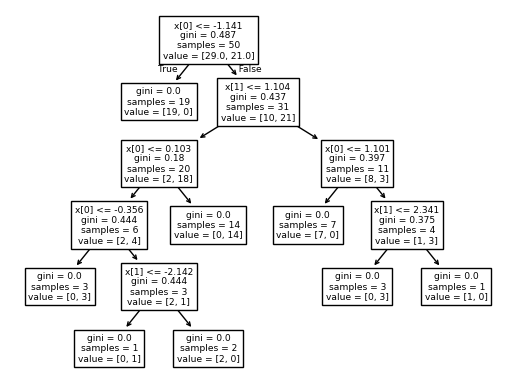

In [53]:
plot_tree(clf1)

[Text(0.6666666666666666, 0.9545454545454546, 'x[1] <= -1.688\ngini = 0.497\nsamples = 50\nvalue = [27, 23]'),
 Text(0.6, 0.8636363636363636, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.6333333333333333, 0.9090909090909092, 'True  '),
 Text(0.7333333333333333, 0.8636363636363636, 'x[1] <= 1.651\ngini = 0.484\nsamples = 39\nvalue = [16, 23]'),
 Text(0.7, 0.9090909090909092, '  False'),
 Text(0.6, 0.7727272727272727, 'x[0] <= 0.419\ngini = 0.499\nsamples = 29\nvalue = [15.0, 14.0]'),
 Text(0.5333333333333333, 0.6818181818181818, 'x[0] <= -0.155\ngini = 0.497\nsamples = 26\nvalue = [12, 14]'),
 Text(0.4, 0.5909090909090909, 'x[0] <= -0.676\ngini = 0.475\nsamples = 18\nvalue = [11, 7]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= -1.33\ngini = 0.498\nsamples = 15\nvalue = [8, 7]'),
 Text(0.13333333333333333, 0.4090909090909091, 'x[1] <= -0.102\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.06666666666666667, 0.3181818181818182, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Tex

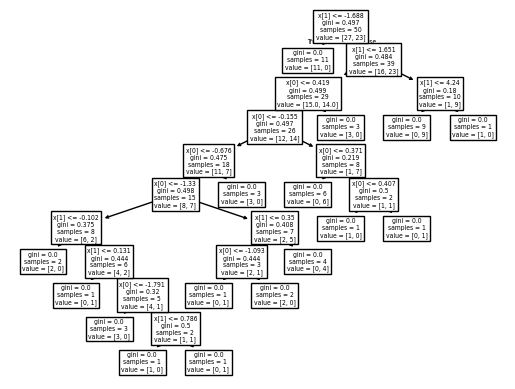

In [55]:
plot_tree(clf2)

[Text(0.4166666666666667, 0.9285714285714286, 'x[1] <= -1.573\ngini = 0.487\nsamples = 50\nvalue = [21.0, 29.0]'),
 Text(0.16666666666666666, 0.7857142857142857, 'x[0] <= -0.71\ngini = 0.465\nsamples = 19\nvalue = [12, 7]'),
 Text(0.2916666666666667, 0.8571428571428572, 'True  '),
 Text(0.08333333333333333, 0.6428571428571429, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.25, 0.6428571428571429, 'x[1] <= -2.101\ngini = 0.32\nsamples = 15\nvalue = [12, 3]'),
 Text(0.16666666666666666, 0.5, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.3333333333333333, 0.5, 'x[1] <= -1.723\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.25, 0.35714285714285715, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.4166666666666667, 0.35714285714285715, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6666666666666666, 0.7857142857142857, 'x[0] <= -0.016\ngini = 0.412\nsamples = 31\nvalue = [9, 22]'),
 Text(0.5416666666666666, 0.8571428571428572, '  False'),
 Text(0.5833333333333334, 0.

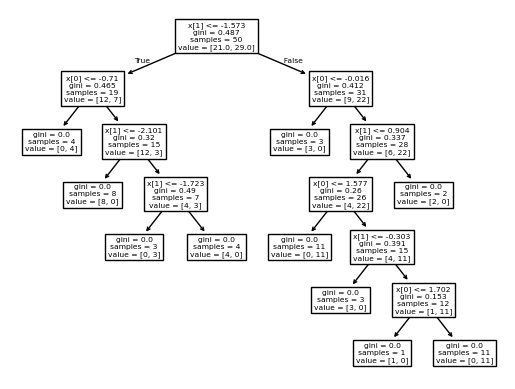

In [57]:
plot_tree(clf3)

In [59]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\vicky\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [61]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\vicky\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [63]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\vicky\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [65]:

df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
54,-3.072968,0.890097,-2.040421,0.485687,-0.220361,0
24,0.809399,1.264581,-0.978163,2.410402,-0.724753,0
17,-0.142450,-2.828436,1.223169,-1.523313,-2.747382,1
23,-1.211732,2.594380,-0.103255,0.781400,-2.797142,0
67,-2.006079,-1.177520,-0.364313,2.609881,0.344589,1
44,-2.807782,1.280309,1.122418,3.382131,0.018059,1
33,-1.389487,-1.497879,0.471612,0.945375,-1.241381,1
34,0.682648,-3.151234,0.950846,-1.916417,-2.480010,1
20,-0.801098,0.252305,-0.054729,0.342620,0.078671,0
94,-1.597436,1.563423,-2.269870,2.680418,-0.744737,0
